# CNN

In [ ]:
# cnn :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix


In [ ]:
train_path = '/content/drive/MyDrive/Datasets/data/train'
test_path = '/content/drive/MyDrive/Datasets/data/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

test_batches = test_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
model = Sequential()

# 1st convnet layer
model.add(Conv2D(32, 3, activation='relu' , input_shape=(224,224,3)))
model.add(MaxPool2D())

# 2nd convnet layer
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())

# 3rd convnet layer
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

#hidden layer 1
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.4))

#hidden layer 2
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))

#hidden layer 3
model.add(Dense(32 , activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(3, activation = 'softmax'))

In [ ]:
# model compiling
model.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# training model
history= model.fit(x=train_batches,
    epochs= 15,
    verbose=2
)

Epoch 1/15
8/8 - 90s - loss: 1.3534 - accuracy: 0.3745 - 90s/epoch - 11s/step
Epoch 2/15
8/8 - 10s - loss: 1.0683 - accuracy: 0.4183 - 10s/epoch - 1s/step
Epoch 3/15
8/8 - 10s - loss: 1.0243 - accuracy: 0.4781 - 10s/epoch - 1s/step
Epoch 4/15
8/8 - 10s - loss: 0.9136 - accuracy: 0.5339 - 10s/epoch - 1s/step
Epoch 5/15
8/8 - 10s - loss: 0.7947 - accuracy: 0.5976 - 10s/epoch - 1s/step
Epoch 6/15
8/8 - 10s - loss: 0.7371 - accuracy: 0.6773 - 10s/epoch - 1s/step
Epoch 7/15
8/8 - 9s - loss: 0.5831 - accuracy: 0.7251 - 9s/epoch - 1s/step
Epoch 8/15
8/8 - 10s - loss: 0.5006 - accuracy: 0.7968 - 10s/epoch - 1s/step
Epoch 9/15
8/8 - 11s - loss: 0.4336 - accuracy: 0.7809 - 11s/epoch - 1s/step
Epoch 10/15
8/8 - 9s - loss: 0.4122 - accuracy: 0.8207 - 9s/epoch - 1s/step
Epoch 11/15
8/8 - 10s - loss: 0.3391 - accuracy: 0.8645 - 10s/epoch - 1s/step
Epoch 12/15
8/8 - 10s - loss: 0.3071 - accuracy: 0.8725 - 10s/epoch - 1s/step
Epoch 13/15
8/8 - 10s - loss: 0.2469 - accuracy: 0.9004 - 10s/epoch - 1s/ste

In [ ]:
print(model.evaluate(x=test_batches))

8/8 [==============================] - 10s 1s/step - loss: 0.1111 - accuracy: 0.9681
[0.11107849329710007, 0.9681274890899658]


# DenseNet121

In [ ]:
# DenseNet :
from keras.applications.densenet import DenseNet121
base_model=DenseNet121(input_shape=(224,224,3),
                 include_top=False,
                 weights='imagenet')


29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

x=Flatten()(base_model.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(3,activation='softmax')(x)
model=tensorflow.keras.Model(base_model.input,x)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.fit(x=train_batches,steps_per_epoch=5,epochs=15)

Epoch 1/15
5/5 [==============================] - 10s 1s/step - loss: 5.0245 - accuracy: 0.3688
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 2.4559 - accuracy: 0.3677
Epoch 3/15
5/5 [==============================] - 6s 1s/step - loss: 2.0451 - accuracy: 0.5032
Epoch 4/15
5/5 [==============================] - 6s 1s/step - loss: 1.1726 - accuracy: 0.5355
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 1.0248 - accuracy: 0.6645
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.8266 - accuracy: 0.6323
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 0.8204 - accuracy: 0.6903
Epoch 8/15
5/5 [==============================] - 6s 1s/step - loss: 0.8039 - accuracy: 0.6516
Epoch 9/15
5/5 [==============================] - 6s 1s/step - loss: 0.6953 - accuracy: 0.7419
Epoch 10/15
5/5 [==============================] - 6s 1s/step - loss: 0.5685 - accuracy: 0.7875
Epoch 11/15
5/5 [==============================]

In [ ]:
print(model.evaluate(x=test_batches))

52/52 [==============================] - 512s 10s/step - loss: 0.7970 - accuracy: 0.6250
[0.7969805598258972, 0.625]


# Resnet50

In [ ]:
# resnet50 :
import tensorflow
from tensorflow.keras.applications import ResNet50
base_model=ResNet50(input_shape=(224,224,3),include_top=False, weights='imagenet', pooling='max')
for layer in base_model.layers:
  layer.trainable=False
from tensorflow.keras.layers import Flatten,Dense,Dropout
x=Flatten()(base_model.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(3,activation='softmax')(x)
model=tensorflow.keras.Model(base_model.input,x)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(x=train_batches,steps_per_epoch=5,epochs=15)

Epoch 1/15
5/5 [==============================] - 10s 1s/step - loss: 5.0245 - accuracy: 0.3688
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 2.4559 - accuracy: 0.3677
Epoch 3/15
5/5 [==============================] - 6s 1s/step - loss: 2.0451 - accuracy: 0.5032
Epoch 4/15
5/5 [==============================] - 6s 1s/step - loss: 1.1726 - accuracy: 0.5355
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 1.0248 - accuracy: 0.6645
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.8266 - accuracy: 0.6323
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 0.8204 - accuracy: 0.6903
Epoch 8/15
5/5 [==============================] - 6s 1s/step - loss: 0.8039 - accuracy: 0.6516
Epoch 9/15
5/5 [==============================] - 6s 1s/step - loss: 0.6953 - accuracy: 0.7419
Epoch 10/15
5/5 [==============================] - 6s 1s/step - loss: 0.5685 - accuracy: 0.7875
Epoch 11/15
5/5 [==============================]

In [ ]:
print(model.evaluate(x=test_batches))

8/8 [==============================] - 11s 1s/step - loss: 0.3852 - accuracy: 0.8446
[0.38518136739730835, 0.8446215391159058]


# VGG16

In [ ]:
# vgg16 :
from tensorflow.keras.applications.vgg16 import VGG16
base_model=VGG16(input_shape=(224,224,3),
                 include_top=False,
                 weights='imagenet')


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False
from tensorflow.keras.layers import Flatten,Dense,Dropout
x=Flatten()(base_model.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(3,activation='softmax')(x)
model=tensorflow.keras.Model(base_model.input,x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x=train_batches,steps_per_epoch=5,epochs=7)

Epoch 1/7
5/5 [==============================] - 7s 1s/step - loss: 0.4391 - accuracy: 0.8813
Epoch 2/7
5/5 [==============================] - 6s 1s/step - loss: 0.1081 - accuracy: 0.9613
Epoch 3/7
5/5 [==============================] - 8s 2s/step - loss: 0.1214 - accuracy: 0.9548
Epoch 4/7
5/5 [==============================] - 6s 1s/step - loss: 0.1296 - accuracy: 0.9484
Epoch 5/7
5/5 [==============================] - 7s 1s/step - loss: 0.0733 - accuracy: 0.9688
Epoch 6/7
5/5 [==============================] - 6s 1s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/7
5/5 [==============================] - 6s 1s/step - loss: 0.0318 - accuracy: 0.9871


In [ ]:
print(model.evaluate(x=testing_set))

52/52 [==============================] - 398s 8s/step - loss: 0.9224 - accuracy: 0.7596
[0.922358512878418, 0.7596153616905212]


# Deep Autoencoders

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import datetime, os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.preprocessing import image

train_path = "/content/drive/MyDrive/Datasets/data/train/Healthy/"
test_path = "/content/drive/MyDrive/Datasets/data/train/Healthy/"

train = []
for filename in os.listdir(train_path):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") :
        img = image.load_img(train_path+filename, target_size=(124,124))
        train.append(image.img_to_array(img))
train = np.array(train)

test = []
for filename in os.listdir(test_path):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        img = image.load_img(test_path+filename, target_size=(124,124))
        test.append(image.img_to_array(img))
test = np.array(test)


In [ ]:
x_train = train/ 255.0
x_test = test / 255.0
print(x_train.shape)
print(x_test.shape)

(70, 124, 124, 3)
(70, 124, 124, 3)


In [ ]:
# deep autoencoder :
batch_size = 60

img_rows, img_cols = 124,124
nb_visible = img_rows * img_cols
nb_hidden = 128
input_img = Input(shape=(img_rows,img_cols,3))
x=Dense(392, input_dim=nb_visible, activation='relu')(input_img)
x=Dense(196, activation='relu')(x)
x=Dense(nb_hidden, activation='relu')(x)
x=Dense(196, activation='relu')(x)
x=Dense(392, activation='relu')(x)
output=Dense(3, activation='sigmoid')(x)
autoencoder = Model(input_img, output)
autoencoder.compile(loss='mse', optimizer='Adam')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 dense_30 (Dense)            (None, 124, 124, 392)     1568      
                                                                 
 dense_31 (Dense)            (None, 124, 124, 196)     77028     
                                                                 
 dense_32 (Dense)            (None, 124, 124, 128)     25216     
                                                                 
 dense_33 (Dense)            (None, 124, 124, 196)     25284     
                                                                 
 dense_34 (Dense)            (None, 124, 124, 392)     77224     
                                                                 
 dense_35 (Dense)            (None, 124, 124, 3)       1179

In [ ]:
# Train
autoencoder.fit(x_train,x_train, epochs=30, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test,x_test))
print("Training Finished!")

Epoch 1/30
2/2 [==============================] - 1s 583ms/step - loss: 0.0374 - val_loss: 0.0335
Epoch 2/30
2/2 [==============================] - 1s 541ms/step - loss: 0.0330 - val_loss: 0.0270
Epoch 3/30
2/2 [==============================] - 1s 539ms/step - loss: 0.0267 - val_loss: 0.0213
Epoch 4/30
2/2 [==============================] - 1s 546ms/step - loss: 0.0209 - val_loss: 0.0166
Epoch 5/30
2/2 [==============================] - 1s 539ms/step - loss: 0.0162 - val_loss: 0.0127
Epoch 6/30
2/2 [==============================] - 1s 541ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 7/30
2/2 [==============================] - 1s 539ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 8/30
2/2 [==============================] - 1s 539ms/step - loss: 0.0092 - val_loss: 0.0076
Epoch 9/30
2/2 [==============================] - 1s 540ms/step - loss: 0.0074 - val_loss: 0.0052
Epoch 10/30
2/2 [==============================] - 1s 537ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 11/30
2/2 [==

3/3 [==============================] - 0s 116ms/step


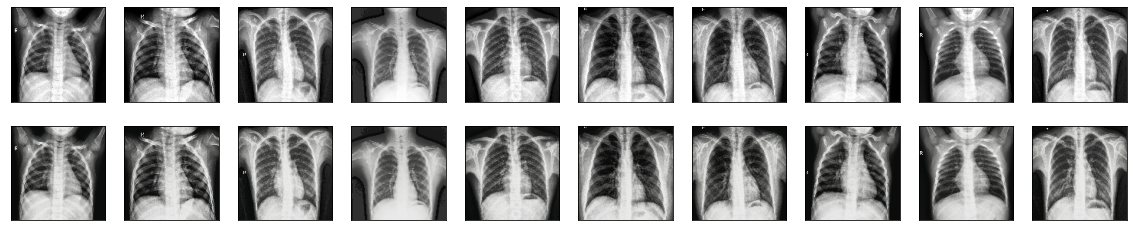

In [ ]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(124,124,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(124,124,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Variational autoencoders

In [ ]:
import os
import time
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
img_height, img_width = 256, 256
batch_size = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 1 disease/',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode=None)

Found 111 files belonging to 1 classes.


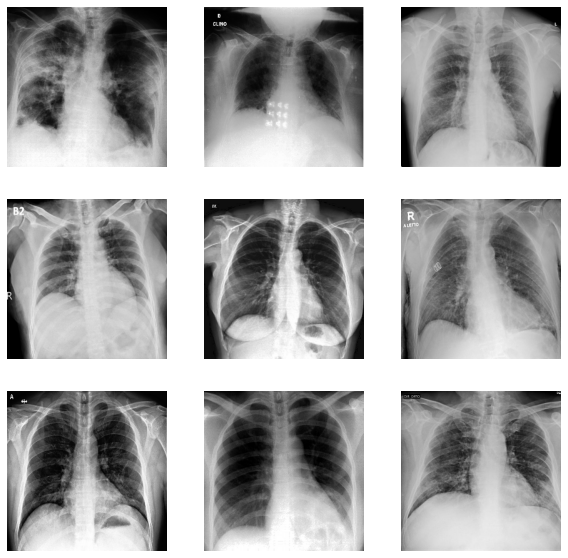

In [ ]:
plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(scale= 1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x: normalization_layer(x))
image_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [ ]:
print(np.min(first_image), np.max(first_image))

0.0 0.9993954


In [ ]:
input_encoder = (256, 256, 3)
input_decoder = (200,)

In [ ]:
def sampling_model(distribution_params):
    mean, log_var = distribution_params
    epsilon = K.random_normal(shape=K.shape(mean), mean=0., stddev=1.)
    return mean + K.exp(log_var / 2) * epsilon

In [ ]:
def encoder(input_encoder):


    inputs = keras.Input(shape=input_encoder, name='input_layer')

    # Block-1
    x = layers.Conv2D(32, kernel_size=3, strides= 2, padding='same', name='conv_1')(inputs)
    x = layers.BatchNormalization(name='bn_1')(x)
    x = layers.LeakyReLU(name='lrelu_1')(x)

    # Block-2
    x = layers.Conv2D(64, kernel_size=3, strides= 2, padding='same', name='conv_2')(x)
    x = layers.BatchNormalization(name='bn_2')(x)
    x = layers.LeakyReLU(name='lrelu_2')(x)

    # Block-3
    x = layers.Conv2D(64, 3, 2, padding='same', name='conv_3')(x)
    x = layers.BatchNormalization(name='bn_3')(x)
    x = layers.LeakyReLU(name='lrelu_3')(x)

    # Block-4
    x = layers.Conv2D(64, 3, 2, padding='same', name='conv_4')(x)
    x = layers.BatchNormalization(name='bn_4')(x)
    x = layers.LeakyReLU(name='lrelu_4')(x)

    # Block-5
    x = layers.Conv2D(64, 3, 2, padding='same', name='conv_5')(x)
    x = layers.BatchNormalization(name='bn_5')(x)
    x = layers.LeakyReLU(name='lrelu_5')(x)


    # Final Block
    flatten = layers.Flatten()(x)
    mean = layers.Dense(200, name='mean')(flatten)
    log_var = layers.Dense(200, name='log_var')(flatten)
    model = tf.keras.Model(inputs, (mean, log_var), name="Encoder")
    return model

In [ ]:
enc = encoder(input_encoder)

In [ ]:
enc.summary()

Model: "Encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1 (Conv2D)                (None, 128, 128, 32  896         ['input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 bn_1 (BatchNormalization)      (None, 128, 128, 32  128         ['conv_1[0][0]']                 
                                )                                                           

In [ ]:
input_1 = (200,)
input_2 = (200,)

In [ ]:
def sampling(input_1,input_2):
    #input1 = layers.Lambda(sampling_model, name='encoder_output')([mean, log_var])
    mean = keras.Input(shape=input_1, name='input_layer1')
    log_var = keras.Input(shape=input_2, name='input_layer2')
    out = layers.Lambda(sampling_model, name='encoder_output')([mean, log_var])
    enc_2 = tf.keras.Model([mean,log_var], out,  name="Encoder_2")
    return enc_2

In [ ]:
final = sampling(input_1,input_2)

In [ ]:
def decoder(input_decoder):

    inputs = keras.Input(shape=input_decoder, name='input_layer')
    x = layers.Dense(4096, name='dense_1')(inputs)
    x = layers.Reshape((8,8,64), name='Reshape')(x)

    # Block-1
    x = layers.Conv2DTranspose(64, 3, strides= 2, padding='same',name='conv_transpose_1')(x)
    x = layers.BatchNormalization(name='bn_1')(x)
    x = layers.LeakyReLU(name='lrelu_1')(x)

    # Block-2
    x = layers.Conv2DTranspose(64, 3, strides= 2, padding='same', name='conv_transpose_2')(x)
    x = layers.BatchNormalization(name='bn_2')(x)
    x = layers.LeakyReLU(name='lrelu_2')(x)

    # Block-3
    x = layers.Conv2DTranspose(64, 3, 2, padding='same', name='conv_transpose_3')(x)
    x = layers.BatchNormalization(name='bn_3')(x)
    x = layers.LeakyReLU(name='lrelu_3')(x)

    # Block-4
    x = layers.Conv2DTranspose(32, 3, 2, padding='same', name='conv_transpose_4')(x)
    x = layers.BatchNormalization(name='bn_4')(x)
    x = layers.LeakyReLU(name='lrelu_4')(x)


    # Block-5
    outputs = layers.Conv2DTranspose(3, 3, 2,padding='same', activation='sigmoid', name='conv_transpose_5')(x)
    model = tf.keras.Model(inputs, outputs, name="Decoder")
    return model

In [ ]:
dec = decoder(input_decoder)

In [ ]:
dec.summary()

Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200)]             0         
                                                                 
 dense_1 (Dense)             (None, 4096)              823296    
                                                                 
 Reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv_transpose_1 (Conv2DTra  (None, 16, 16, 64)       36928     
 nspose)                                                         
                                                                 
 bn_1 (BatchNormalization)   (None, 16, 16, 64)        256       
                                                                 
 lrelu_1 (LeakyReLU)         (None, 16, 16, 64)        0         
                                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def mse_loss(y_true, y_pred):
    r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
    return 1000 * r_loss

def kl_loss(mean, log_var):
    kl_loss =  -0.5 * K.sum(1 + log_var - K.square(mean) - K.exp(log_var), axis = 1)
    return kl_loss



In [ ]:
def vae_loss(y_true, y_pred, mean, log_var):
    #r_loss = mse_loss(y_true, y_pred)
    #kl_loss = kl_loss(mean, log_var)
    return  mse_loss(y_true, y_pred) + kl_loss(mean, log_var)

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):

    with tf.GradientTape() as encoder, tf.GradientTape() as decoder:

        mean, log_var = enc(images, training=True)
        latent = final([mean, log_var])
        generated_images = dec(latent, training=True)
        loss = vae_loss(images, generated_images, mean, log_var)


    gradients_of_enc = encoder.gradient(loss, enc.trainable_variables)
    gradients_of_dec = decoder.gradient(loss, dec.trainable_variables)


    optimizer.apply_gradients(zip(gradients_of_enc, enc.trainable_variables))
    optimizer.apply_gradients(zip(gradients_of_dec, dec.trainable_variables))
    return loss

In [ ]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 1 disease/', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 1 disease/', exist_ok=True)

In [ ]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        i = 0
        loss_ = []
        for image_batch in dataset:
            i += 1
            loss = train_step(image_batch)
            #loss_.append(loss)

        #print("Loss",np.mean(loss_))
        seed = image_batch[:25]
        display.clear_output(wait=True)
        generate_and_save_images([enc,final,dec],
                                  epoch + 1,
                                  seed)
        # Save the model every 15 epochs
        #if (epoch + 1) % 15 == 0:
        #checkpoint.save(file_prefix = checkpoint_prefix)
        enc.save_weights('/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 1 disease/enc_'+ str(epoch)+'.h5')
        dec.save_weights('/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 1 disease/dec_'+ str(epoch)+'.h5')
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

        # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images([enc,final,dec],
                            epochs,
                            seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    mean, var = enc(test_input, training=False)
    latent = final([mean, var])
    predictions = dec(latent, training=False)
    print(predictions.shape)
    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1)
        pred = predictions[i, :, :, :] * 255
        pred = np.array(pred)
        pred = pred.astype(np.uint8)
        #cv2.imwrite('tf_ae/images/image'+ str(i)+'.png',pred)

        plt.imshow(pred)
        plt.axis('off')

    plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 1 disease/image_at_epoch_{:d}.png'.format(epoch))
    plt.show()

(25, 256, 256, 3)


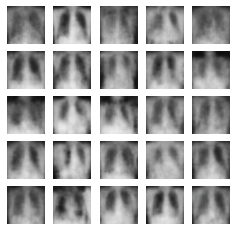

In [ ]:
train(normalized_ds, 500)

# GAN

In [ ]:
import os
import time
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
%matplotlib inline
from tensorflow import keras

In [ ]:
img_height, img_width = 128, 128
batch_size = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train/Type 2 disease',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode=None)

Found 70 files belonging to 1 classes.


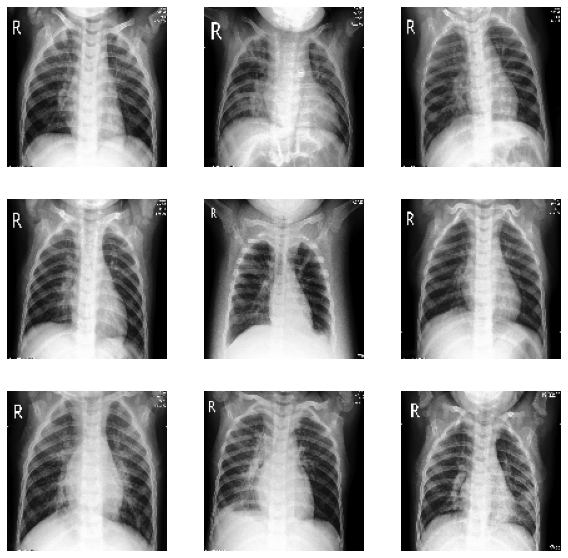

In [ ]:
plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(scale= 1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x: normalization_layer(x))
image_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [ ]:
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(32*32*128, use_bias=False, input_shape=(100,))) # 12544
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((32, 32, 128)))

    # Because we used "same" padding and stride = 1, the output is the same size as input 7 x 7 but with 128 filters instead
    # Resulting in 7 x 7 x 128
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Because we used "same" padding and stride = 2, the output is double the size of the input 14 x 14 but with 64 filters instead
    # Resulting in 14 x 14 x 64
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Because we used "same" padding and stride = 2, the output is double the size of the input 28 x 28 but with 1 filter instead
    # Resulting in 28 x 28 x 1
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    model.summary()

    return model

In [ ]:
# Let's test it and check the dimensions
generator = make_generator_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 131072)            13107200  
                                                                 
 batch_normalization (BatchN  (None, 131072)           524288    
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 131072)            0         
                                                                 
 reshape (Reshape)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 128)      409600    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      5

In [ ]:
# Let's test it with a random noise seed and see the output

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 128, 128, 3])

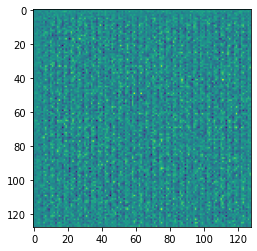

In [ ]:
plt.imshow(generated_image[0,:,:,0])

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    model.summary()

    return model

In [ ]:
# Let's see the model structure
discriminator = make_discriminator_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 flatten (Flatten)           (None, 131072)           

In [ ]:
# Give it a shot and see if the discriminator was able to classify the image or not!
# The model will be trained to output positive values for real images, and negative values for fake images.
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00103644]], shape=(1, 1), dtype=float32)


In [ ]:
# This computes the 'loss' which simply the difference between the model predictions and the true label
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
# The discriminator loss indicates how well the discriminator is able to distinguish real and fake images.
# It compares the discriminator's predictions on real images to an array of 1s,
# and the discriminator's predictions on fake (generated) images to an array of 0s.

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss # sum up both losses
    return total_loss

In [ ]:
# The discriminator loss indicates how well the discriminator is able to distinguish real and fake images.
# It compares the discriminator's predictions on real images to an array of 1s,
# and the discriminator's predictions on fake (generated) images to an array of 0s.

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss # sum up both losses
    return total_loss

In [ ]:
# The generator's loss quantifies how well it was able to trick the discriminator.
# if the generator is performing well, the discriminator will classify the fake images as real (or 1).
# Here, we will compare the discriminators decisions on the generated images to an array of 1s.

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 1000
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True) # step 1. call the generator and feed in the noise seed

      real_output = discriminator(images, training=True) # step 2. pass the fake and real ones to discriminator to perform classification
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output) # step 3. Calculate the loss for both the generator and discriminator
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) # step 4. calculate the gradient of the losses
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) # step 5. Apply the optimizers and update weights
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      pred = predictions[i, :, :, ] * 255
      pred = np.array(pred)
      pred = pred.astype(np.uint8)
        #cv2.imwrite('tf_ae/images/image'+ str(i)+'.png',pred)

      plt.imshow(pred)

      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

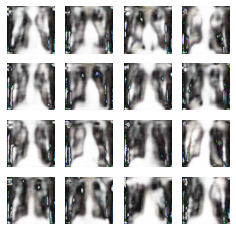

CPU times: user 23min 29s, sys: 59.2 s, total: 24min 29s
Wall time: 20min 54s


In [ ]:
%%time
train(normalized_ds, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

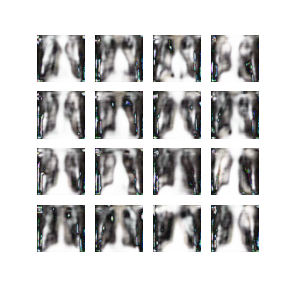

In [ ]:
import PIL
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

display_image(EPOCHS)

# Model Deployment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
data_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/CA4/data/train"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir)

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 201 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 50 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'Type 1 disease', 'Type 2 disease']


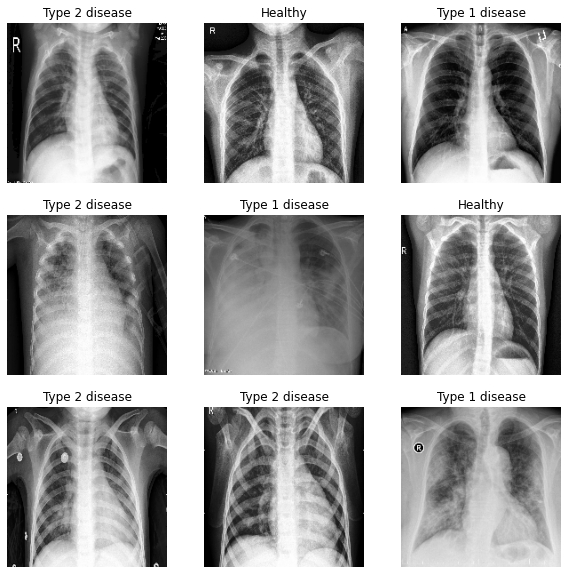

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 15s 755ms/step - loss: 1.0969 - accuracy: 0.5274 - val_loss: 0.7070 - val_accuracy: 0.6800
Epoch 2/10
7/7 [==============================] - 3s 139ms/step - loss: 0.5796 - accuracy: 0.7960 - val_loss: 0.4809 - val_accuracy: 0.8600
Epoch 3/10
7/7 [==============================] - 3s 136ms/step - loss: 0.3709 - accuracy: 0.8209 - val_loss: 0.3569 - val_accuracy: 0.8800
Epoch 4/10
7/7 [==============================] - 3s 140ms/step - loss: 0.2342 - accuracy: 0.9055 - val_loss: 0.1181 - val_accuracy: 0.9600
Epoch 5/10
7/7 [==============================] - 4s 139ms/step - loss: 0.1843 - accuracy: 0.9104 - val_loss: 0.0962 - val_accuracy: 0.9600
Epoch 6/10
7/7 [==============================] - 3s 139ms/step - loss: 0.1708 - accuracy: 0.9254 - val_loss: 0.1396 - val_accuracy: 0.9600
Epoch 7/10
7/7 [==============================] - 3s 141ms/step - loss: 0.1242 - accuracy: 0.9552 - val_loss: 0.0858 - val_accuracy: 0.9600
Epoch 8/10
7/7 [==============

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 182 kB 69.5 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 164 kB 71.1 MB/s 
     |████████████████████████████████| 4.7 MB 41.8 MB/s 
     |████████████████████████████████| 237 kB 69.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Lung Infection Detection
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png","jpeg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):

        size = (180,180)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        img_reshape = img[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    st.write(score)
    class_names = ['Healthy', 'Type 1 disease', 'Type 2 disease']
    st.write(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Overwriting app.py


In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2Fw4wRqhQWtpAuJPgjulj66GqGW_6P7jfFBq7uVX7kUf1EL5Z

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8501')
url

'http://9cc2-34-139-249-240.ngrok.io'

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-10-13 10:08:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.237.133.81, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  59.2MB/s    in 0.2s    

2022-10-13 10:08:11 (59.2 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://9cc2-34-139-249-240.ngrok.io


In [ ]:
!streamlit run /content/app.py

2022-10-13 10:10:03.325 INFO    numexpr.utils: NumExpr defaulting to 2 threads.



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.139.249.240:8501

2022-10-13 10:10:58.132542: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1/1 [==============================] - 0s 31ms/step
